<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task2/blob/main/RoBERTa_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00


In [2]:
# Cargar datos preprocesados
train_data = pd.read_csv('/content/df_train_ok.csv', delimiter=',', encoding='latin1')
test_data = pd.read_csv('/content/df_test_ok.csv', delimiter=',', encoding='latin1')


In [3]:

# Cargar el tokenizador de BERT
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', vocab_size=30522)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


# Cargar el modelo BERT pre-entrenado
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

test_data['text'] = test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [ ]:
import numpy as np

train_data['text'] = train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=50, truncation=True)
    token_lenss.append(len(tokens))

max_len=np.max(token_lenss)

In [4]:
X = train_data['text'].values
y = train_data['task2'].values
Z = test_data['text'].values
z= test_data['task2'].values

In [ ]:
print(X)

['tiktok million like becausethjsi think woman shouldnt cover shoulder like yassss absolute bare minimum respect youuu'
 'feel extra lonely also'
 'encantado incluyas sentir identificado palabra twits mujer libre supuesto'
 ... 'miss beautiful' 'hour free_fall floorissue aipc ipcipcipcdp mgtow'
 'would Moslem fry violation mob advantageously description']


In [5]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task2, val_task2 = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(train_text)

['unpopular horror opinionsthe master_copy caning tiresome wish adaptation hangdog pleasureall chucky picture_show Halloween picture_show Fri picture_show Texas chainsaw mow_down picture_show just'
 'wilderness matter indication Jean-Jacques_Rousseau confession rapidly proudly beau accommodate subservient youre wish Sir_Frederick_Handley_Page wish have_it_away prevailing cleaning_woman likewise misdemean intent she-goat would paddle'
 'solo culo dejar sodomizar paso jodir dems' ...
 'like woman deserves beaten cant defend instead praise discipline herden come whiiiiiiiiiip realise even play kshubilebane nkani nakhona uthola balwela impahla christmas woman bashayelwa zona'
 'mujer escuchar alga mismo rochy verdad'
 'weona maqullatir qued definido canal rato metoocamilavallejometoo']


In [6]:
MAX_LEN=255

In [7]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
from sklearn import preprocessing
import numpy as np
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task2).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task2).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

In [9]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True

        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [10]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [11]:
train_input_ids, train_attention_masks = tokenize_roberta(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(Z, MAX_LEN)

In [12]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)


(4476, 255)
(1120, 255)
(4368, 255)


In [ ]:
print(train_attention_masks.shape)
print(val_attention_masks.shape)
print(test_attention_masks.shape)


(4476, 255)
(1120, 255)
(4368, 255)


In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [17]:
def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)

    output = tf.keras.layers.Dense(6, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping


Añadimos regularización L1 o L2 para intentar eliminar sobre ajuste

In [ ]:
import tensorflow as tf

def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)

    # Agregar regularización L2
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax, kernel_regularizer=tf.keras.regularizers.l2(0.01))(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping


In [18]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [19]:
#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_model(roberta_model, MAX_LEN)
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_roberta_model_1 (TFRobertaM  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 odel)                          thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                         

In [20]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=16)


Epoch 1/5
280/280 [==============================] - 315s 940ms/step - loss: 0.3660 - binary_accuracy: 0.8512 - val_loss: 0.3050 - val_binary_accuracy: 0.8790
Epoch 2/5
280/280 [==============================] - 246s 880ms/step - loss: 0.2843 - binary_accuracy: 0.8861 - val_loss: 0.2802 - val_binary_accuracy: 0.8882
Epoch 3/5
280/280 [==============================] - 248s 887ms/step - loss: 0.2438 - binary_accuracy: 0.9015 - val_loss: 0.2718 - val_binary_accuracy: 0.8906
Epoch 4/5
280/280 [==============================] - 248s 887ms/step - loss: 0.2036 - binary_accuracy: 0.9189 - val_loss: 0.3020 - val_binary_accuracy: 0.8878
Epoch 5/5
280/280 [==============================] - 248s 886ms/step - loss: 0.1682 - binary_accuracy: 0.9349 - val_loss: 0.3306 - val_binary_accuracy: 0.8863


In [21]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

137/137 [==============================] - 77s 538ms/step


In [22]:
# Evaluar el modelo
evaluation = model.evaluate([test_input_ids, test_attention_masks], z_test)

# Imprimir los resultados de la evaluación
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

137/137 [==============================] - 78s 543ms/step - loss: 0.2644 - binary_accuracy: 0.9104
Loss: 0.2644467055797577
Accuracy: 0.9103708863258362


In [23]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

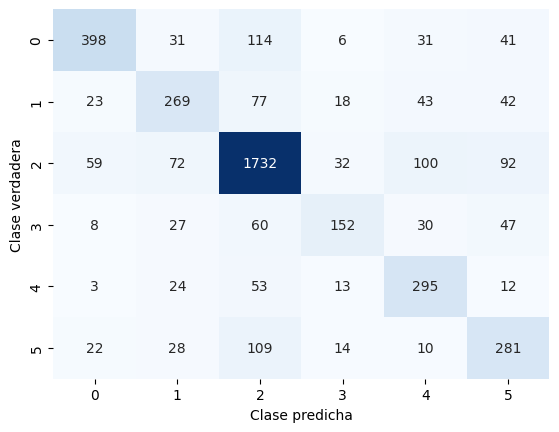

In [24]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_roberta.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()


137/137 [==============================] - 74s 542ms/step
Resultados de RoBERTa:
[[1.0833770e-02 3.2800052e-01 2.8834373e-01 1.9520059e-01 2.9773643e-02
  1.4784773e-01]
 [1.3090961e-03 9.5240909e-01 1.8453795e-02 9.2994468e-03 3.8028392e-03
  1.4725766e-02]
 [4.5718194e-04 2.2499444e-02 1.7937063e-01 1.3205799e-03 7.9410076e-01
  2.2514146e-03]
 ...
 [6.6925204e-05 3.0543251e-04 9.9850452e-01 2.1749958e-04 1.5643885e-04
  7.4932125e-04]
 [1.3693691e-02 1.1252714e-01 8.0361640e-01 2.8185414e-03 5.1335651e-02
  1.6008472e-02]
 [9.9440479e-01 2.4320437e-03 2.0418607e-03 5.1617390e-04 2.0875475e-04
  3.9644679e-04]]
Predicciones de RoBERTa:
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


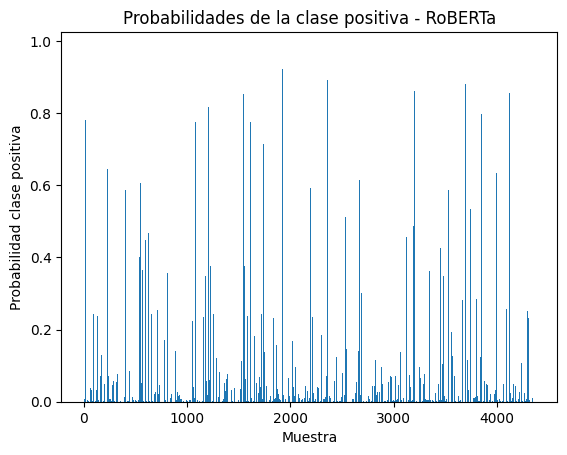

In [25]:
result_roberta = model.predict([test_input_ids, test_attention_masks])
y_pred_roberta = np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

# Imprimir result_roberta
print("Resultados de RoBERTa:")
print(result_roberta)

# Imprimir y_pred_roberta
print("Predicciones de RoBERTa:")
print(y_pred_roberta)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_roberta[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - RoBERTa")
plt.show()


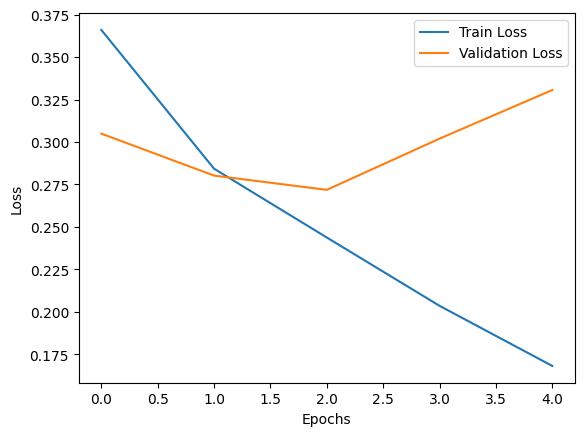

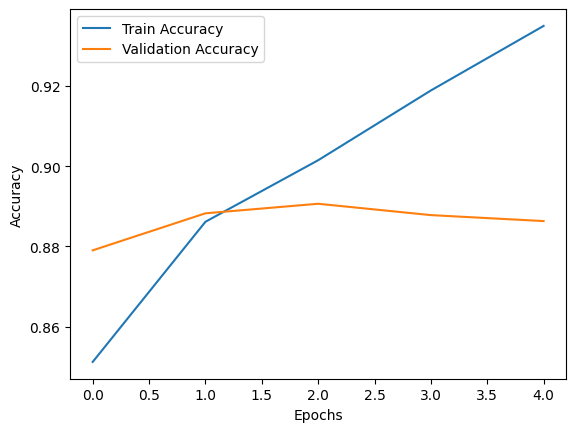

In [26]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
train_accuracy = history_2.history['binary_accuracy']
val_accuracy = history_2.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


DATA_AUGMENTATION

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet

def augment_data_with_synonyms(data_frame, text_column, label_column):
    augmented_data = []
    for index, row in data_frame.iterrows():
        sentence = row[text_column]
        label = row[label_column]
        augmented_sentence = []
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            synonyms = wordnet.synsets(token)
            if synonyms:
                synonym = synonyms[0].lemmas()[0].name()
                augmented_sentence.append(synonym)
            else:
                augmented_sentence.append(token)
        augmented_data.append({'text': ' '.join(augmented_sentence), 'task1': label})
    augmented_df = pd.DataFrame(augmented_data)
    augmented_df = pd.concat([data_frame, augmented_df], ignore_index=True)
    return augmented_df


# Convertir la columna de texto a tipo string
train_data['text'] = train_data['text'].astype(str)
# Aplicar data augmentation
augmented_df = augment_data_with_synonyms(train_data, 'text', 'task1')

# Imprimir el DataFrame original y el ampliado
print("DataFrame original:")
print(train_data)

print("\nDataFrame ampliado con sinónimos:")
print(augmented_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


DataFrame original:
                                                   text       task1
0     race baiting point accurately medium speculati...  non-sexist
1     assassin right assassin creed spit water like ...      sexist
2                                   seguro hermoso nico  non-sexist
3     quin haber decir poder reclamar rbitro creer m...  non-sexist
4     feliz navidad leer rubio tontar mejor deseo ca...      sexist
...                                                 ...         ...
6972                  miss juncker great bint borrrring  non-sexist
6973  dont know youve notice racism isnt something p...  non-sexist
6974  literally less hour woman first erase story va...      sexist
6975  abortar desear muerte nadie obligar abortar si...  non-sexist
6976  curioso tinder falda corto sostn solayo tena a...      sexist

[6977 rows x 2 columns]

DataFrame ampliado con sinónimos:
                                                    text       task1
0      race baiting point accuratel

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')
nltk.download('omw-1.4')

def get_synonyms(word, language):
    if language == 'en':
        synsets = wordnet.synsets(word)
        synonyms = []
        for synset in synsets:
            for lemma in synset.lemmas():
                synonyms.append(lemma.name())
        return list(set(synonyms))
    elif language == 'es':
        synsets = wordnet.synsets(word, lang='spa')
        synonyms = []
        for synset in synsets:
            for lemma in synset.lemmas(lang='spa'):
                synonyms.append(lemma.name())
        return list(set(synonyms))
    else:
        return [word]

def augment_data_with_synonyms(data_frame, text_column, label_column, language_column):
    augmented_data = []
    for index, row in data_frame.iterrows():
        sentence = row[text_column]
        label = row[label_column]
        language = row[language_column]
        augmented_sentence = []
        tokens = word_tokenize(sentence)
        for token in tokens:
            synonyms = get_synonyms(token, language)
            if synonyms:
                synonym = synonyms[0]
                augmented_sentence.append(synonym)
            else:
                augmented_sentence.append(token)
        augmented_data.append({'text': ' '.join(augmented_sentence), 'task1': label})
    augmented_df = pd.DataFrame(augmented_data)
    augmented_df = pd.concat([data_frame, augmented_df], ignore_index=True)
    return augmented_df


# Convertir la columna de texto a tipo string
train_data['text'] = train_data['text'].astype(str)
# Aplicar data augmentation
augmented_df = augment_data_with_synonyms(train_data, 'text', 'task1', 'language')

# Imprimir el DataFrame original y el ampliado
print("DataFrame original:")
print(train_data)

print("\nDataFrame ampliado con sinónimos:")
print(augmented_df)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


DataFrame original:
                                                   text       task1 language
0     tiktok million like becausethjsi think woman s...      sexist       en
1                                feel extra lonely also  non-sexist       en
2     encantado incluyas sentir identificado palabra...  non-sexist       es
3     dont want piss next trans woman idiot girl kno...      sexist       en
4     tener sistema salud dinamarca suecia inglaterr...  non-sexist       es
...                                                 ...         ...      ...
6972  read bible right letter paul support oppressio...      sexist       en
6973  tener carcter mierda desconfiado nunca cambiar...      sexist       es
6974                                     girl beautiful  non-sexist       en
6975        hour fall floorissue aipc ipcipcipcdp mgtow  non-sexist       en
6976      would muslim child rape gang well description      sexist       en

[6977 rows x 3 columns]

DataFrame ampliado con sinónim

In [ ]:
print("Longitud del DataFrame combinado:", len(augmented_df))


Longitud del DataFrame combinado: 13954
